In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

/tmp/ipykernel_7871/2025783173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")


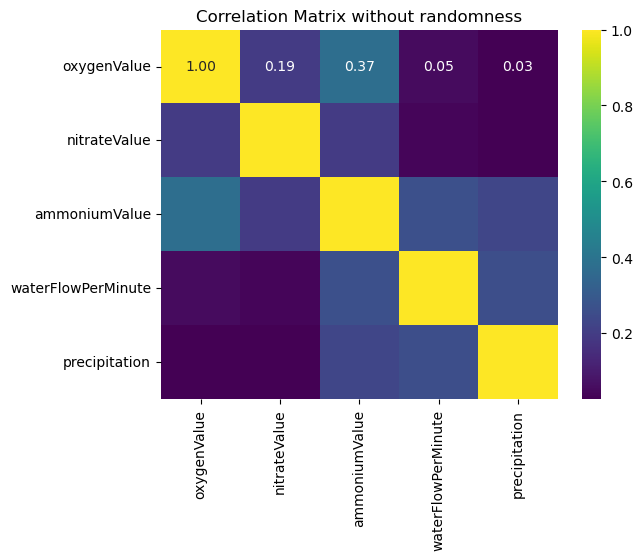

,nitrateValue,ammoniumValue,waterFlowPerMinute,precipitation
count,526308.000000,526308.000000,526287.000000,526308.000000
mean,3.951883,3.603189,1763.680636,19.727578
std,2.022273,2.940397,1440.092079,36.981252
min,0.073000,0.000000,14.227700,0.000000
25%,2.446000,1.361000,618.701615,0.000000
50%,3.510000,3.004000,1539.588479,1.000000
75%,4.942000,5.100000,2554.860357,27.000000
max,9.988000,19.985000,8082.788080,245.000000


In [2]:
df = pd.read_parquet('../data/cleanedData/allData.parquet')
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix without randomness')
plt.show()
target = df.pop('oxygenValue')
df.drop(columns=['measurementDate'])
features = df
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=42)
df['measurementDate'].describe()

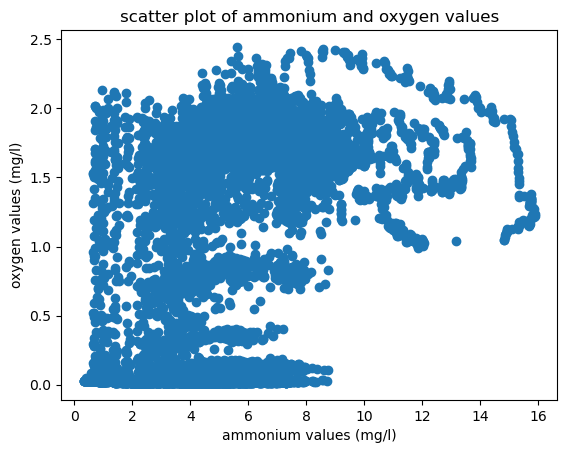

In [3]:
plt.scatter(df['ammoniumValue'].head(20000),target.head(20000))
plt.ylabel('oxygen values (mg/l)')
plt.xlabel('ammonium values (mg/l)')
plt.title("scatter plot of ammonium and oxygen values")
plt.show()

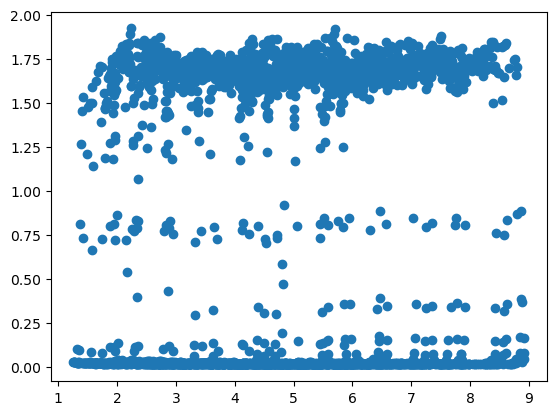

In [4]:
plt.scatter(df['nitrateValue'].head(3000),target.head(3000))

In [5]:
# plt.scatter(df['phosphateValue'].head(3000),target.head(3000))

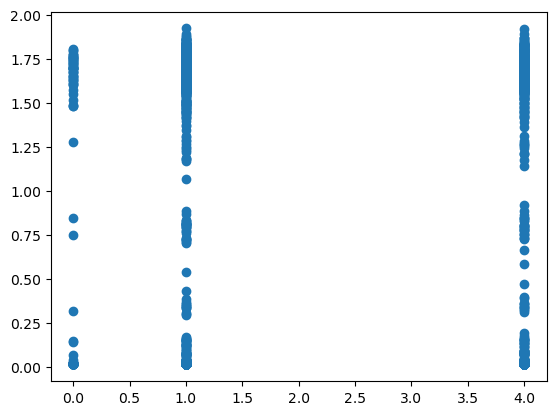

In [6]:
plt.scatter(df['precipitation'].head(3000),target.head(3000))

In [7]:
# plt.figure(figsize=(30,20))
# plt.scatter(target.head(50000), df['ammoniumValue'].head(50000), label="Oxygen vs Ammonia")
# plt.scatter(target.head(50000), df['phosphateValue'].head(50000), label="Oxygen vs Phosphate")
# plt.scatter(target.head(50000), df['nitrateValue'].head(50000), label="Oxygen vs Nitrate")

# # Add labels and title
# plt.xlabel("Oxygen")
# plt.ylabel("Value")
# plt.title("Scatter Plot of Oxygen vs Other Factors")

# # Add legend
# plt.legend()

# # Display the plot
# plt.show()

In [8]:
value = y_train.mean()

In [9]:
pred_train = [value]* len(y_train)
pred_test = [value]* len(y_test)

In [10]:
root_mean_squared_error(y_train,pred_train)

0.6516983416708346

In [11]:
root_mean_squared_error(y_test, pred_test)

0.6496561697254066

In [12]:
mean_absolute_error(y_test,pred_test)

0.5739264927282213

In [13]:
mean_absolute_error(y_train,pred_train)

0.5752725181042437

In [14]:
r2_score(y_test[0:len(pred_test)],pred_test)

-3.853280979826401e-05

In [15]:
r2_score(y_test,pred_test)

-3.853280979826401e-05

In [16]:
pred_train

[0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641563495,
 0.5925105641

In [17]:
target[327106]

0.256

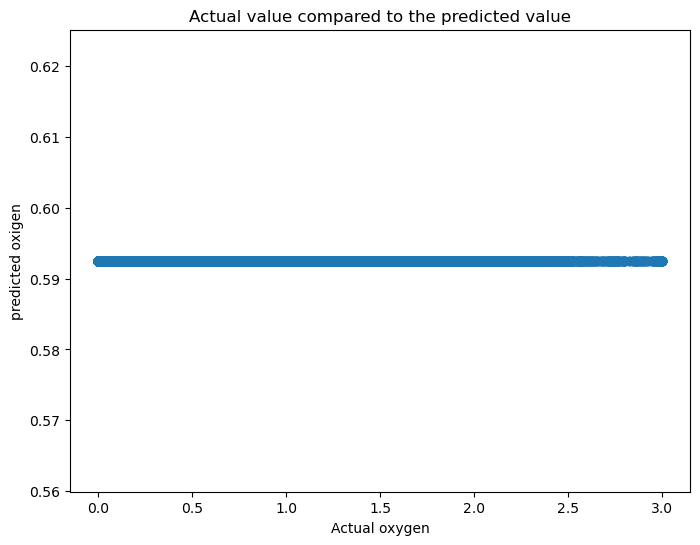

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test)
plt.xlabel('Actual oxygen')
plt.ylabel('predicted oxigen')
plt.title('Actual value compared to the predicted value')
plt.show()

Mean Squared Error: 0.3559941177612624
Coefficients: [ 0.04047484  0.08037409 -0.00107924]
Intercept: 0.1642937482721304


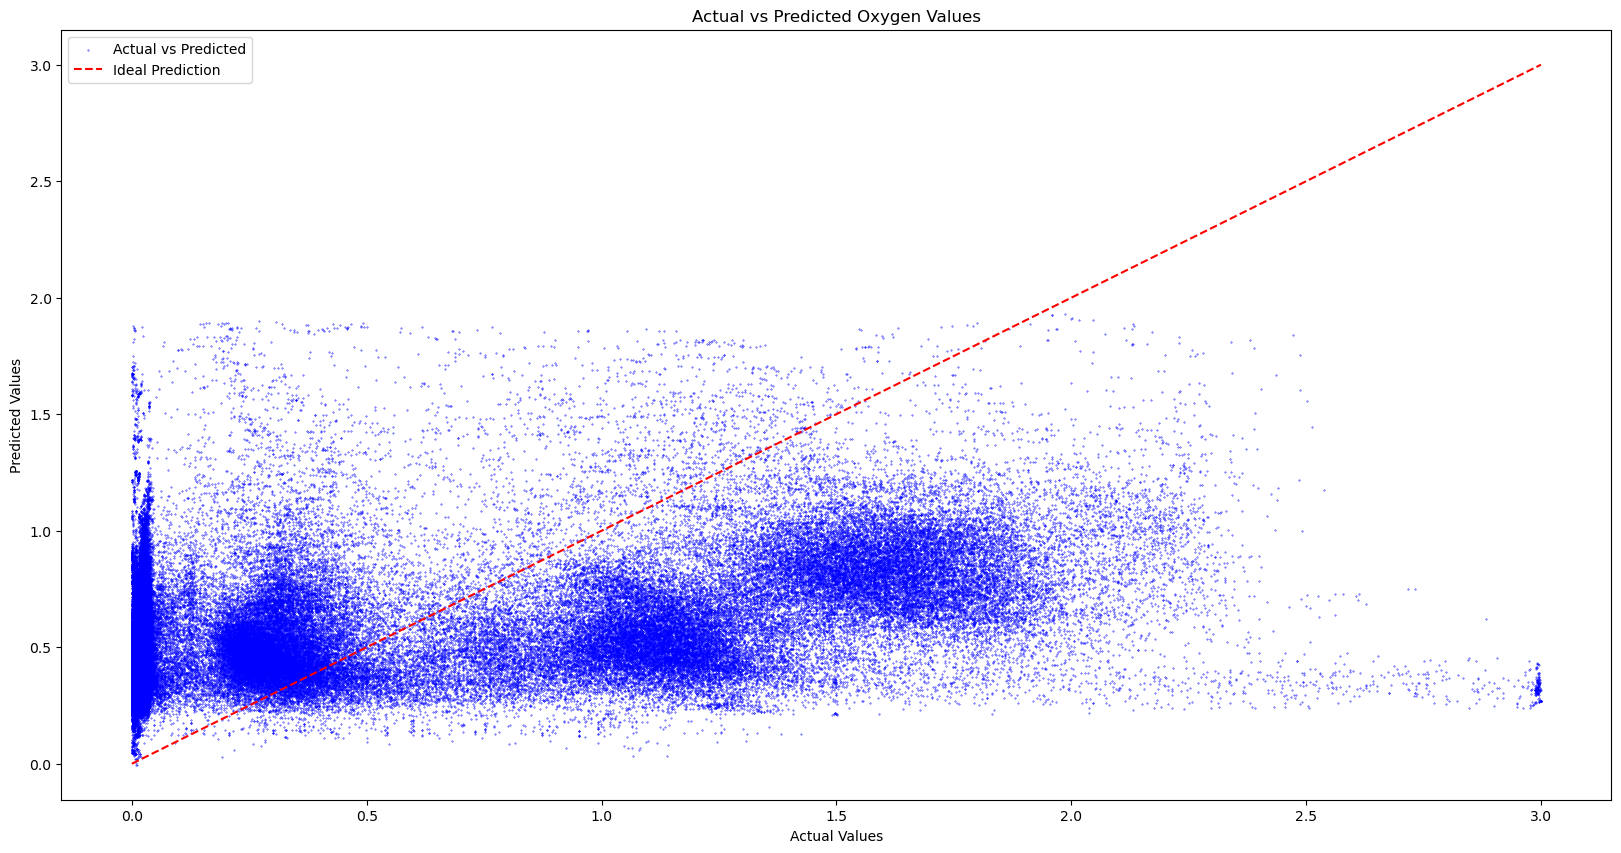

R-squared Score: 0.1564857539631881


In [19]:
df = pd.read_parquet('../data/cleanedData/allData.parquet')
df.pop('measurementDate')
df.pop('waterFlowPerMinute')



  

target = df.pop('oxygenValue')
features = df
  

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

  

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)

print("Intercept:", model.intercept_)

plt.figure(figsize=(20, 10))

plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted', s=0.1)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.title('Actual vs Predicted Oxygen Values')

plt.legend()

plt.show()

r2 = r2_score(y_test, predictions)

print("R-squared Score:", r2)

/tmp/ipykernel_7871/950750922.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")


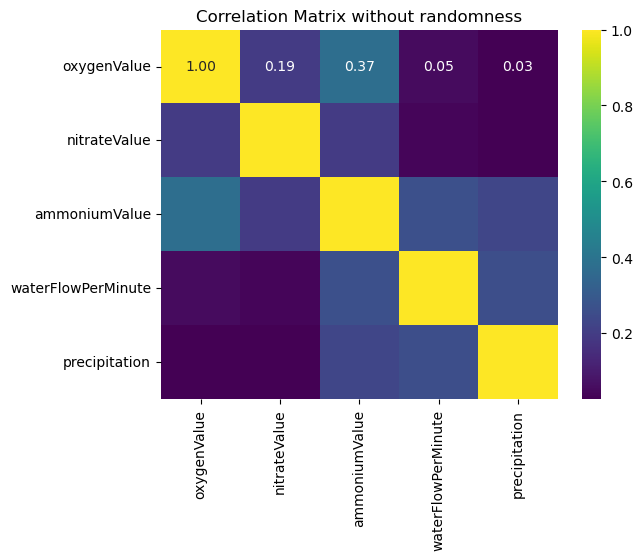

In [20]:
df = pd.read_parquet('../data/cleanedData/allData.parquet')
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix without randomness')
plt.show()